In [83]:
import matplotlib.pylab as plt
%matplotlib inline
import networkx as nx

In [1]:
''' Definimos la funcion para leer el archivo geneX '''
import re
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line = re.sub('["\n]', '', line)
        col=line.split(',')
        data.append(col)
    return data

In [21]:
geneX=ldata('geneX.csv')
geneX[1]

['AT1G01060',
 '10.3176866362518',
 '7.65600446413793',
 '3.39993568220103',
 '1.30679489632012',
 '5.35534800540555',
 '9.00846891441324',
 '9.88520407950861',
 '7.18594496152195',
 '3.05035783179963',
 '1.70774513716189',
 '5.18535879993122',
 '9.02459455955993']

In [17]:
import numpy as np
valores_genes=np.zeros((500, 12))
nombre_genes=[]
for j in range(1,501):
    nombre_genes.append(geneX[j][0])
    for i in range(1,13):
        valores_genes[j-1,i-1]=float(geneX[j][i])

1.0

In [68]:
def similaridad(x,y):
    x_medio=float(sum(x))/len(x)
    y_medio=float(sum(y))/len(y)
    x_y=0
    desv_x=0
    desv_y=0
    for i in range(len(x)):
        x_y+=(x[i]-x_medio)*(y[i]-y_medio)
        desv_x+=(x[i]-x_medio)**2
        desv_y+=(y[i]-y_medio)**2
    desv_x_y=desv_x*desv_y
    return (1+x_y/np.sqrt(desv_x_y))/2

In [77]:
Sim=np.zeros((500,500))
for i in range(500):
    for j in range(0,i):
        Sim[i][j]=similaridad(valores_genes[i],valores_genes[j])
        Sim[j][i]=similaridad(valores_genes[i],valores_genes[j])

In [78]:
enla=[]
for i in range(500):
    for j in range(0,i):
        if Sim[i][j]>=0.95:
            enla.append([nombre_genes[i],nombre_genes[j]])

In [84]:
G=nx.Graph()
G.add_edges_from(enla)

In [91]:
k=[]
for i in G.nodes():
    k.append(G.degree(i))

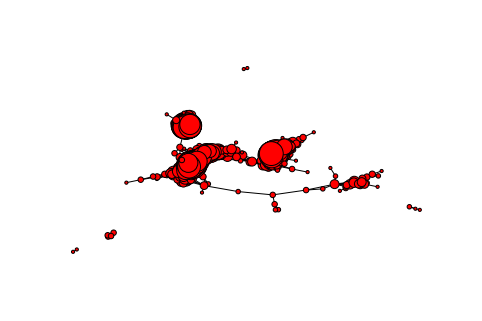

In [93]:
nx.draw(G, with_labels=False, font_weight='bold',node_size=[10*i for i in k])